### 타이타닉 생존자 예측

In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [411]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1. 데이터 전처리

- Feature selection

In [412]:
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked','who','deck']]
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
886,0,2,male,27.0,0,0,13.00,S,man,NaN
887,1,1,female,19.0,0,0,30.00,S,woman,B
888,0,3,female,NaN,1,2,23.45,S,woman,NaN
889,1,1,male,26.0,0,0,30.00,C,man,C
890,0,3,male,32.0,0,0,7.75,Q,man,NaN


- 결측치 처리

In [413]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

In [414]:
adult = df[df.who.isin(['man','woman'])]
child = df[df.who=='child']
adult.shape, child.shape

((808, 10), (83, 10))

In [415]:
df.age.fillna(adult.age.mean().round(1), inplace=True)
df.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
886,0,2,male,27.0,0,0,13.00,S,man,NaN
887,1,1,female,19.0,0,0,30.00,S,woman,B
888,0,3,female,32.8,1,2,23.45,S,woman,NaN
889,1,1,male,26.0,0,0,30.00,C,man,C
890,0,3,male,32.0,0,0,7.75,Q,man,NaN


In [416]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

In [417]:
# embarked 결측치를 최빈값으로 대체
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [418]:
df.embarked.fillna('S', inplace=True)
df.embarked.isna().sum()

0

In [419]:
# deck column 삭제 (결측치가 많아서), who column은 age와 중복
df.drop(columns=['deck','who'], inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,32.8,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [420]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

- 카테고리형 데이터 숫자로 변환

In [421]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [422]:
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
888,0,3,0,32.8,1,2,23.45,2
889,1,1,1,26.0,0,0,30.00,0
890,0,3,1,32.0,0,0,7.75,1


In [423]:
df_std = StandardScaler().fit_transform(df)
pca2 = PCA(n_components=2)
titanic_pca2 = pca2.fit_transform(df_std)

In [424]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3,verbose=1,random_state=2023, n_init='auto')
Kmeans.fit(df_std)

Initialization complete
Iteration 0, inertia 6341.005446978769.
Iteration 1, inertia 4944.173289324029.
Iteration 2, inertia 4879.824375471444.
Iteration 3, inertia 4875.470505884075.
Iteration 4, inertia 4866.546843702461.
Iteration 5, inertia 4855.588545013137.
Iteration 6, inertia 4852.93527614895.
Iteration 7, inertia 4852.30110260665.
Iteration 8, inertia 4852.252505495713.
Converged at iteration 8: strict convergence.


KMeans(n_clusters=3, n_init='auto', random_state=2023, verbose=1)

In [425]:
Kmeans.labels_

array([1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0,

In [426]:
np.unique(Kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([246, 472, 173], dtype=int64))

In [427]:
df2 = pd.DataFrame(titanic_pca2, columns=['PC1','PC2'])
df2['target'] = y
df2['cluster'] =Kmeans.labels_
df2

,PC1,PC2,target,cluster
0,-1.546049,0.622764,0,1
1,2.737031,-1.043508,1,2
2,0.254170,0.387612,1,0
3,1.914958,-0.427553,1,2
4,-1.616656,-0.360741,0,1
...,...,...,...,...
886,-1.051698,-0.495479,0,1
887,1.529146,-0.249809,1,2
888,0.136495,1.841349,0,0
889,1.277552,-1.406826,1,2


In [428]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_samples = silhouette_samples(df_std, Kmeans.labels_)
df2['실루엣 계수'] = sil_samples
df2

,PC1,PC2,target,cluster,실루엣 계수
0,-1.546049,0.622764,0,1,0.496555
1,2.737031,-1.043508,1,2,0.277880
2,0.254170,0.387612,1,0,0.050905
3,1.914958,-0.427553,1,2,0.153225
4,-1.616656,-0.360741,0,1,0.608229
...,...,...,...,...,...
886,-1.051698,-0.495479,0,1,0.555836
887,1.529146,-0.249809,1,2,0.018179
888,0.136495,1.841349,0,0,0.026820
889,1.277552,-1.406826,1,2,0.091734


In [429]:
silhouette_score(df_std, Kmeans.labels_)

0.2809558121686852

In [430]:
df2.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.058550
1,0.456703
2,0.117713


c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\

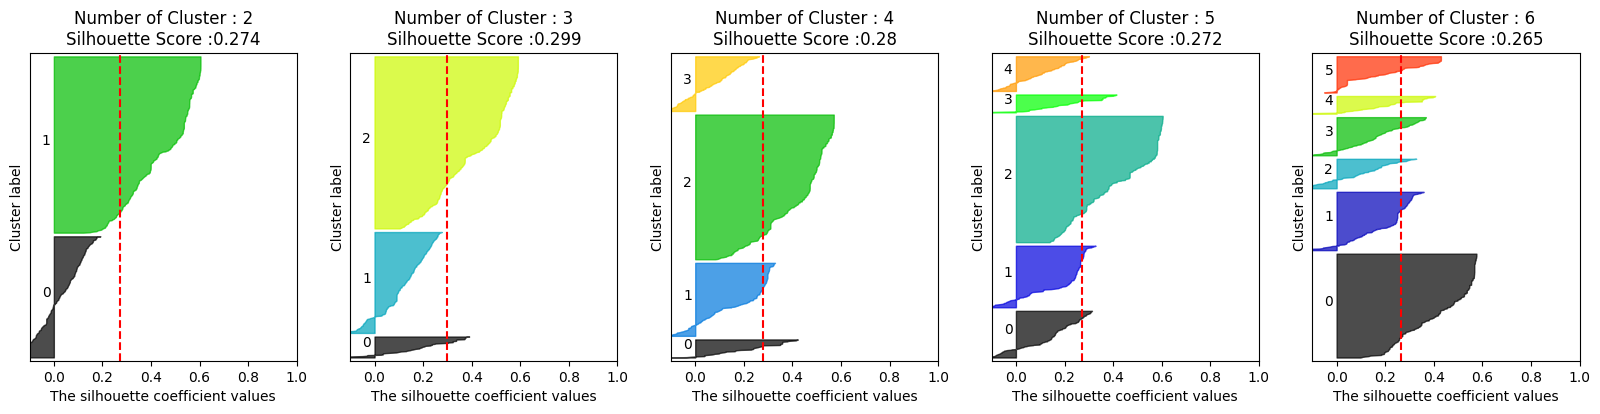

In [431]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5,6], df_std)

In [432]:
rw = pd.read_csv('../03.분류/data/winequality-red.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [433]:
rw_std = StandardScaler().fit_transform(rw)
pcaa3 = PCA(n_components=6)
rw_pca3 = pcaa3.fit_transform(rw_std)

In [434]:
kmeans = KMeans(n_clusters=6, verbose=1, random_state=2023, n_init='auto')
kmeans.fit(rw_std)

Initialization complete
Iteration 0, inertia 14518.052070185624.
Iteration 1, inertia 12100.407464264525.
Iteration 2, inertia 11594.593510956152.
Iteration 3, inertia 11366.745110371767.
Iteration 4, inertia 11256.813377885499.
Iteration 5, inertia 11174.680003926793.
Iteration 6, inertia 11116.395838968163.
Iteration 7, inertia 11091.069956761958.
Iteration 8, inertia 11077.701766802313.
Iteration 9, inertia 11073.670711212624.
Iteration 10, inertia 11072.776660814368.
Iteration 11, inertia 11072.72134434848.
Converged at iteration 11: strict convergence.


KMeans(n_clusters=6, n_init='auto', random_state=2023, verbose=1)

In [435]:
Kmeans.labels_

array([1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0,

In [436]:
np.unique(Kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([246, 472, 173], dtype=int64))

In [1]:
df3 = pd.DataFrame(rw_pca3, columns=['PC1','PC2'])
df3['target'] = y
df3['cluster'] =Kmeans.labels_
df

NameError: name 'pd' is not defined

In [ ]:
sil_samples2 = silhouette_samples(rw_std, kmeans.labels_)
df3['실루엣 계수'] = sil_samples
df3

ValueError: Length of values (891) does not match length of index (1599)

In [ ]:
df3.groupby('cluster')[['실루엣 계수']].mean()

KeyError: 'cluster'

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\

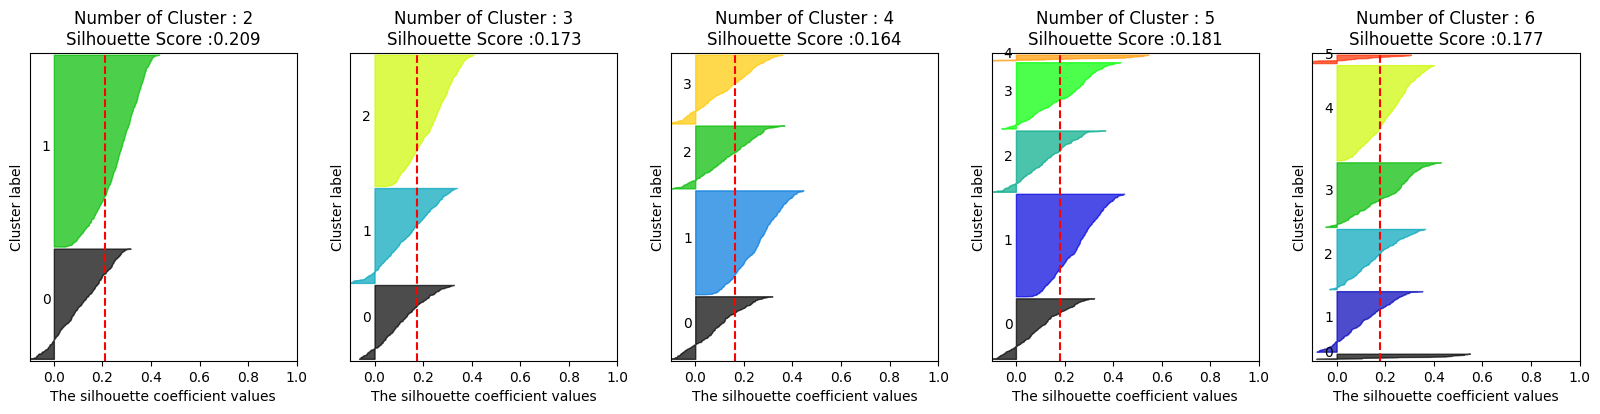

In [ ]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5,6], rw_std)